In [41]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(
    rc={
        "axes.labelsize": 12,
        "axes.titlesize": 16,
        "figure.figsize": (10, 7.5),
        "figure.dpi": 200,
        "figure.edgecolor": "k",
        "figure.facecolor": "w",
    }
)

In [42]:
df = pd.read_feather("2022.ft")
df

,county,gov_22_total,gov_22_whitmer,gov_22_pct_whitmer,gov_22_dixon,gov_22_pct_dixon,gov_22_buzuma,gov_22_pct_buzuma,gov_22_brandenburg,gov_22_pct_brandenburg,...,prop2_22_total,prop2_22_yes,prop2_22_yes_pct,prop2_22_no,prop2_22_no_pct,prop3_22_total,prop3_22_yes,prop3_22_yes_pct,prop3_22_no,prop3_22_no_pct
0,Wayne,645124,457064,0.708490,180426,0.279676,3921,0.006078,1697,0.002631,...,617091,439488,0.712193,177603,0.287807,629761,429882,0.682611,199879,0.317389
1,Oakland,629374,383391,0.609162,238137,0.378371,5001,0.007946,1253,0.001991,...,606413,390158,0.643387,216255,0.356613,619952,396224,0.639120,223728,0.360880
2,Macomb,384541,199277,0.518220,179259,0.466164,3144,0.008176,1690,0.004395,...,365493,211679,0.579160,153814,0.420840,372701,205350,0.550978,167351,0.449022
3,Kent,299095,162680,0.543907,131626,0.440081,2963,0.009907,922,0.003083,...,290579,173753,0.597954,116826,0.402046,294117,161025,0.547486,133092,0.452514
4,Washtenaw,180845,135902,0.751483,42803,0.236683,1277,0.007061,303,0.001675,...,176968,136765,0.772823,40203,0.227177,179208,136354,0.760870,42854,0.239130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Schoolcraft,3884,1524,0.392379,2264,0.582904,45,0.011586,33,0.008496,...,3755,1883,0.501465,1872,0.498535,3806,1728,0.454020,2078,0.545980
79,Baraga,3444,1329,0.385889,2056,0.596980,32,0.009292,16,0.004646,...,3339,1604,0.480383,1735,0.519617,3384,1469,0.434102,1915,0.565898
80,Ontonagon,3259,1319,0.404725,1862,0.571341,27,0.008285,29,0.008898,...,3150,1726,0.547937,1424,0.452063,3166,1553,0.490524,1613,0.509476
81,Luce,2366,786,0.332206,1520,0.642434,20,0.008453,19,0.008030,...,2288,1140,0.498252,1148,0.501748,2318,960,0.414150,1358,0.585850


In [43]:
df.columns

Index(['county', 'gov_22_total', 'gov_22_whitmer', 'gov_22_pct_whitmer',
       'gov_22_dixon', 'gov_22_pct_dixon', 'gov_22_buzuma',
       'gov_22_pct_buzuma', 'gov_22_brandenburg', 'gov_22_pct_brandenburg',
       'gov_22_hogan', 'gov_22_pct_hogan', 'gov_22_simpson',
       'gov_22_pct_simpson', 'sos_22_total', 'sos_22_benson',
       'sos_22_pct_benson', 'sos_22_karamo', 'sos_22_pct_karamo',
       'sos_22_stempfle', 'sos_22_pct_stempfle', 'sos_22_schwartz',
       'sos_22_pct_schwartz', 'sos_22_hutchinson', 'sos_22_pct_hutchinson',
       'ag_22_total', 'ag_22_nessel', 'ag_22_pct_nessel', 'ag_22_deperno',
       'ag_22_pct_deperno', 'ag_22_mchugh', 'ag_22_pct_mchugh',
       'ag_22_van_sickle', 'ag_22_pct_van_sickle', 'prop1_22_total',
       'prop1_22_yes', 'prop1_22_yes_pct', 'prop1_22_no', 'prop1_22_no_pct',
       'prop2_22_total', 'prop2_22_yes', 'prop2_22_yes_pct', 'prop2_22_no',
       'prop2_22_no_pct', 'prop3_22_total', 'prop3_22_yes', 'prop3_22_yes_pct',
       'prop3_22_

Text(0.5, 0, '2022 Whitmer (%)')

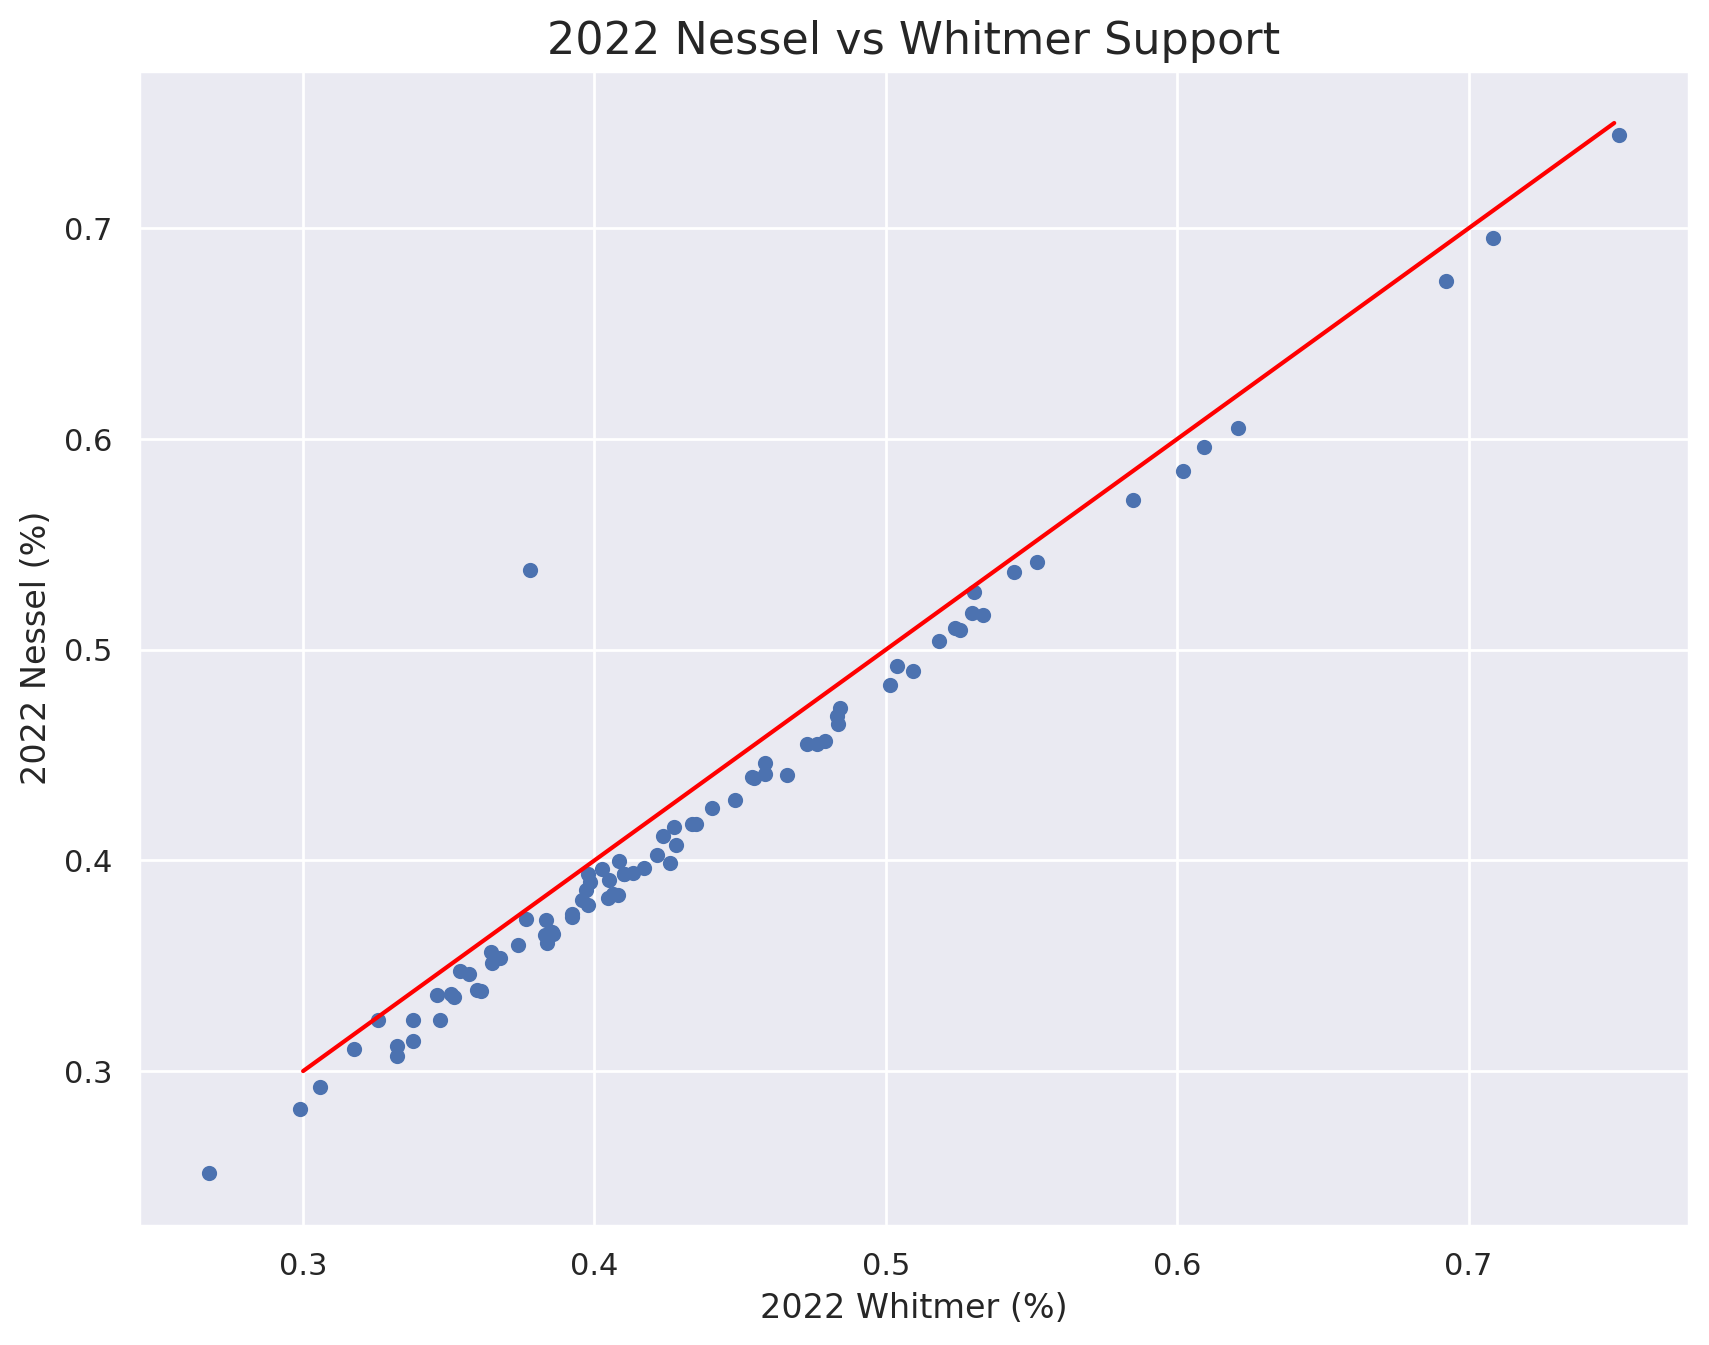

In [44]:
df.plot(x="gov_22_pct_whitmer", y="ag_22_pct_nessel", kind="scatter")
plt.plot([0.3, 0.75], [0.3, 0.75], color="red")
plt.title("2022 Nessel vs Whitmer Support")
plt.ylabel("2022 Nessel (%)")
plt.xlabel("2022 Whitmer (%)")

Find the outlier for high Nessel (~54%) support but low Whitmer (~38%)

In [45]:
df2 = df[(df["gov_22_pct_whitmer"]<0.4) & (df["ag_22_pct_nessel"]>0.5)]
df2[["county", "gov_22_pct_whitmer", "ag_22_pct_nessel", "prop1_22_yes_pct", "prop3_22_yes_pct"]]

,county,gov_22_pct_whitmer,ag_22_pct_nessel,prop1_22_yes_pct,prop3_22_yes_pct
68,Arenac,0.377824,0.537935,0.605789,0.438928


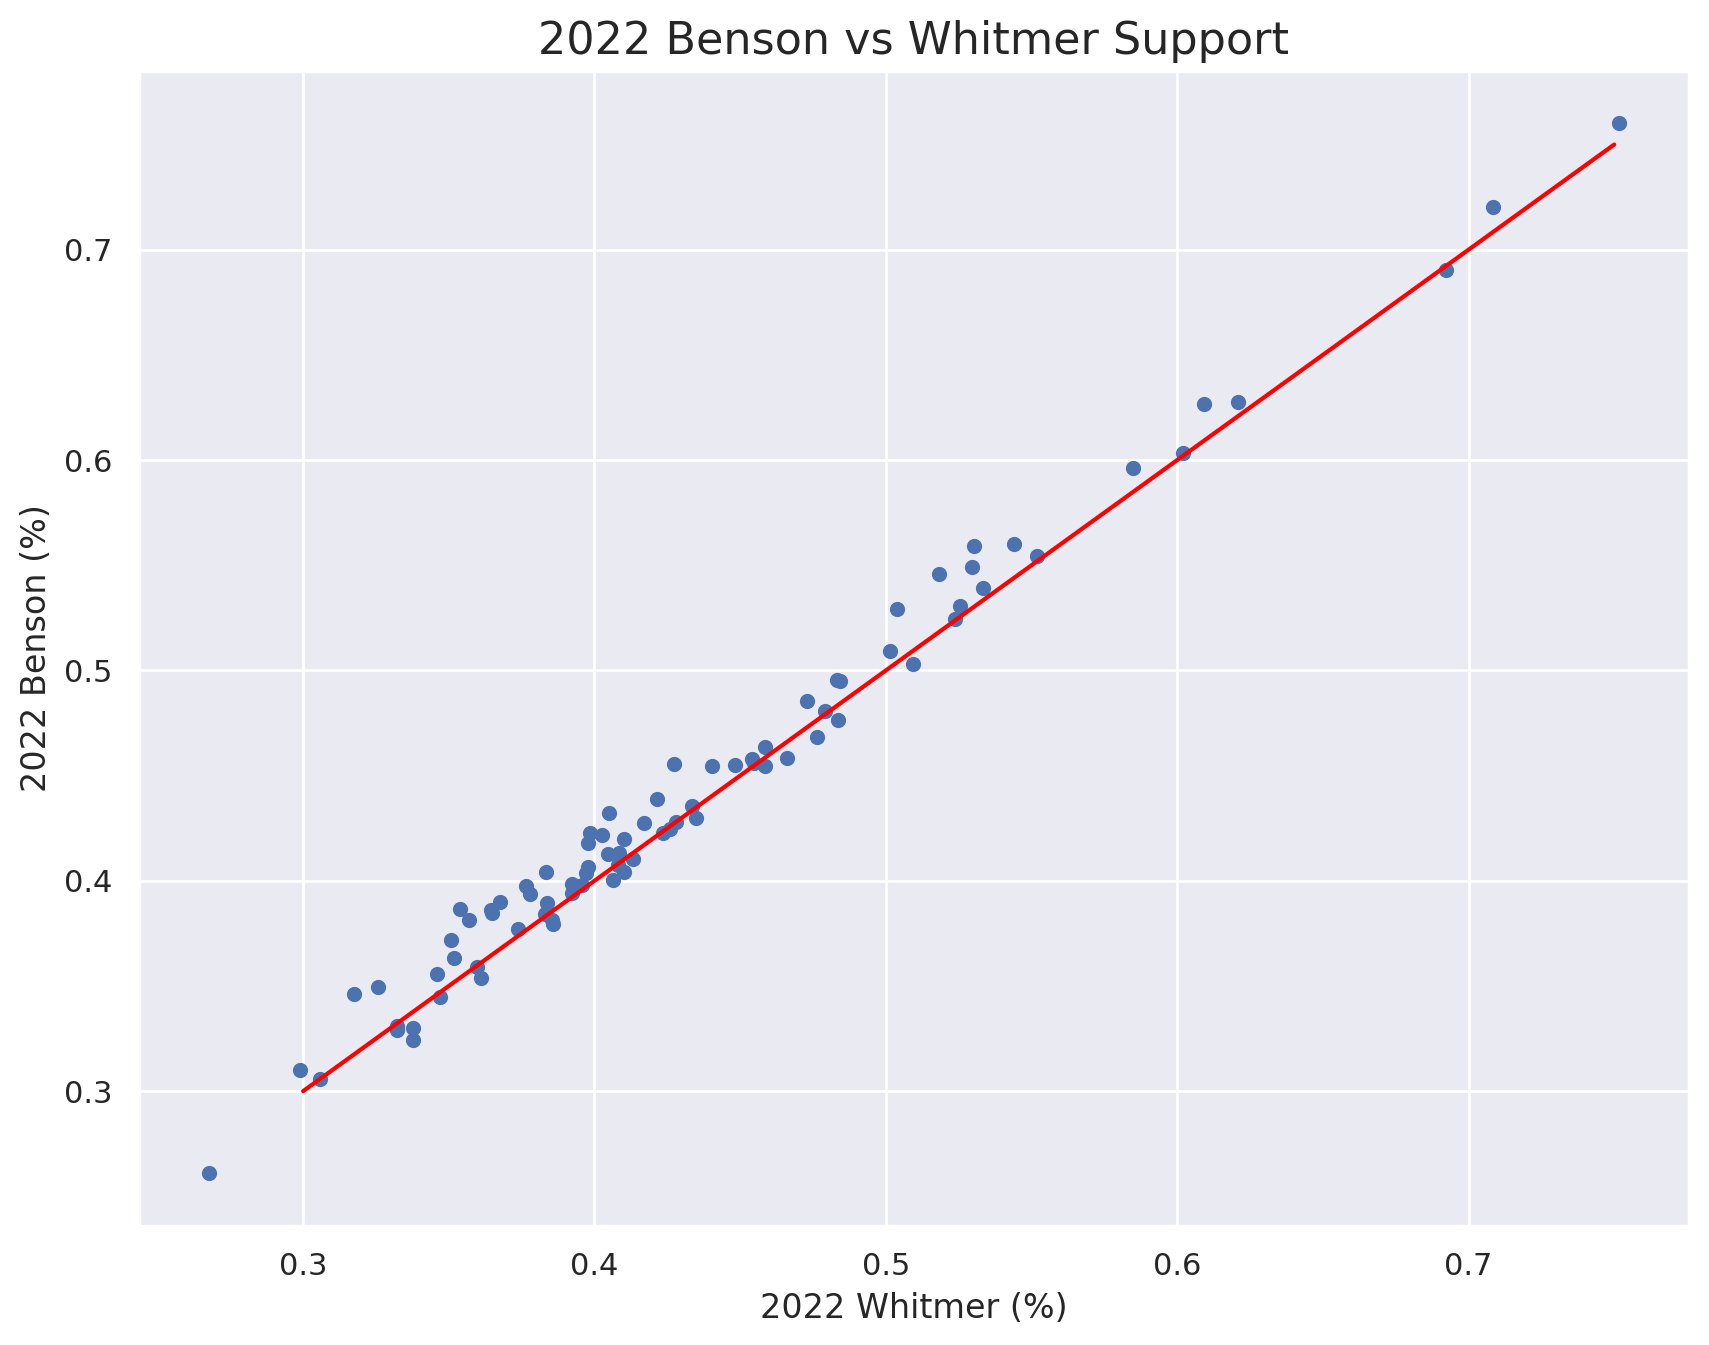

In [46]:
df.plot(x="gov_22_pct_whitmer", y="sos_22_pct_benson", kind="scatter")
plt.title("2022 Benson vs Whitmer Support")
plt.ylabel("2022 Benson (%)")
plt.xlabel("2022 Whitmer (%)")
plt.plot([0.3, 0.75], [0.3, 0.75], color="red")

Text(0.5, 0, '2022 Nessel (%)')

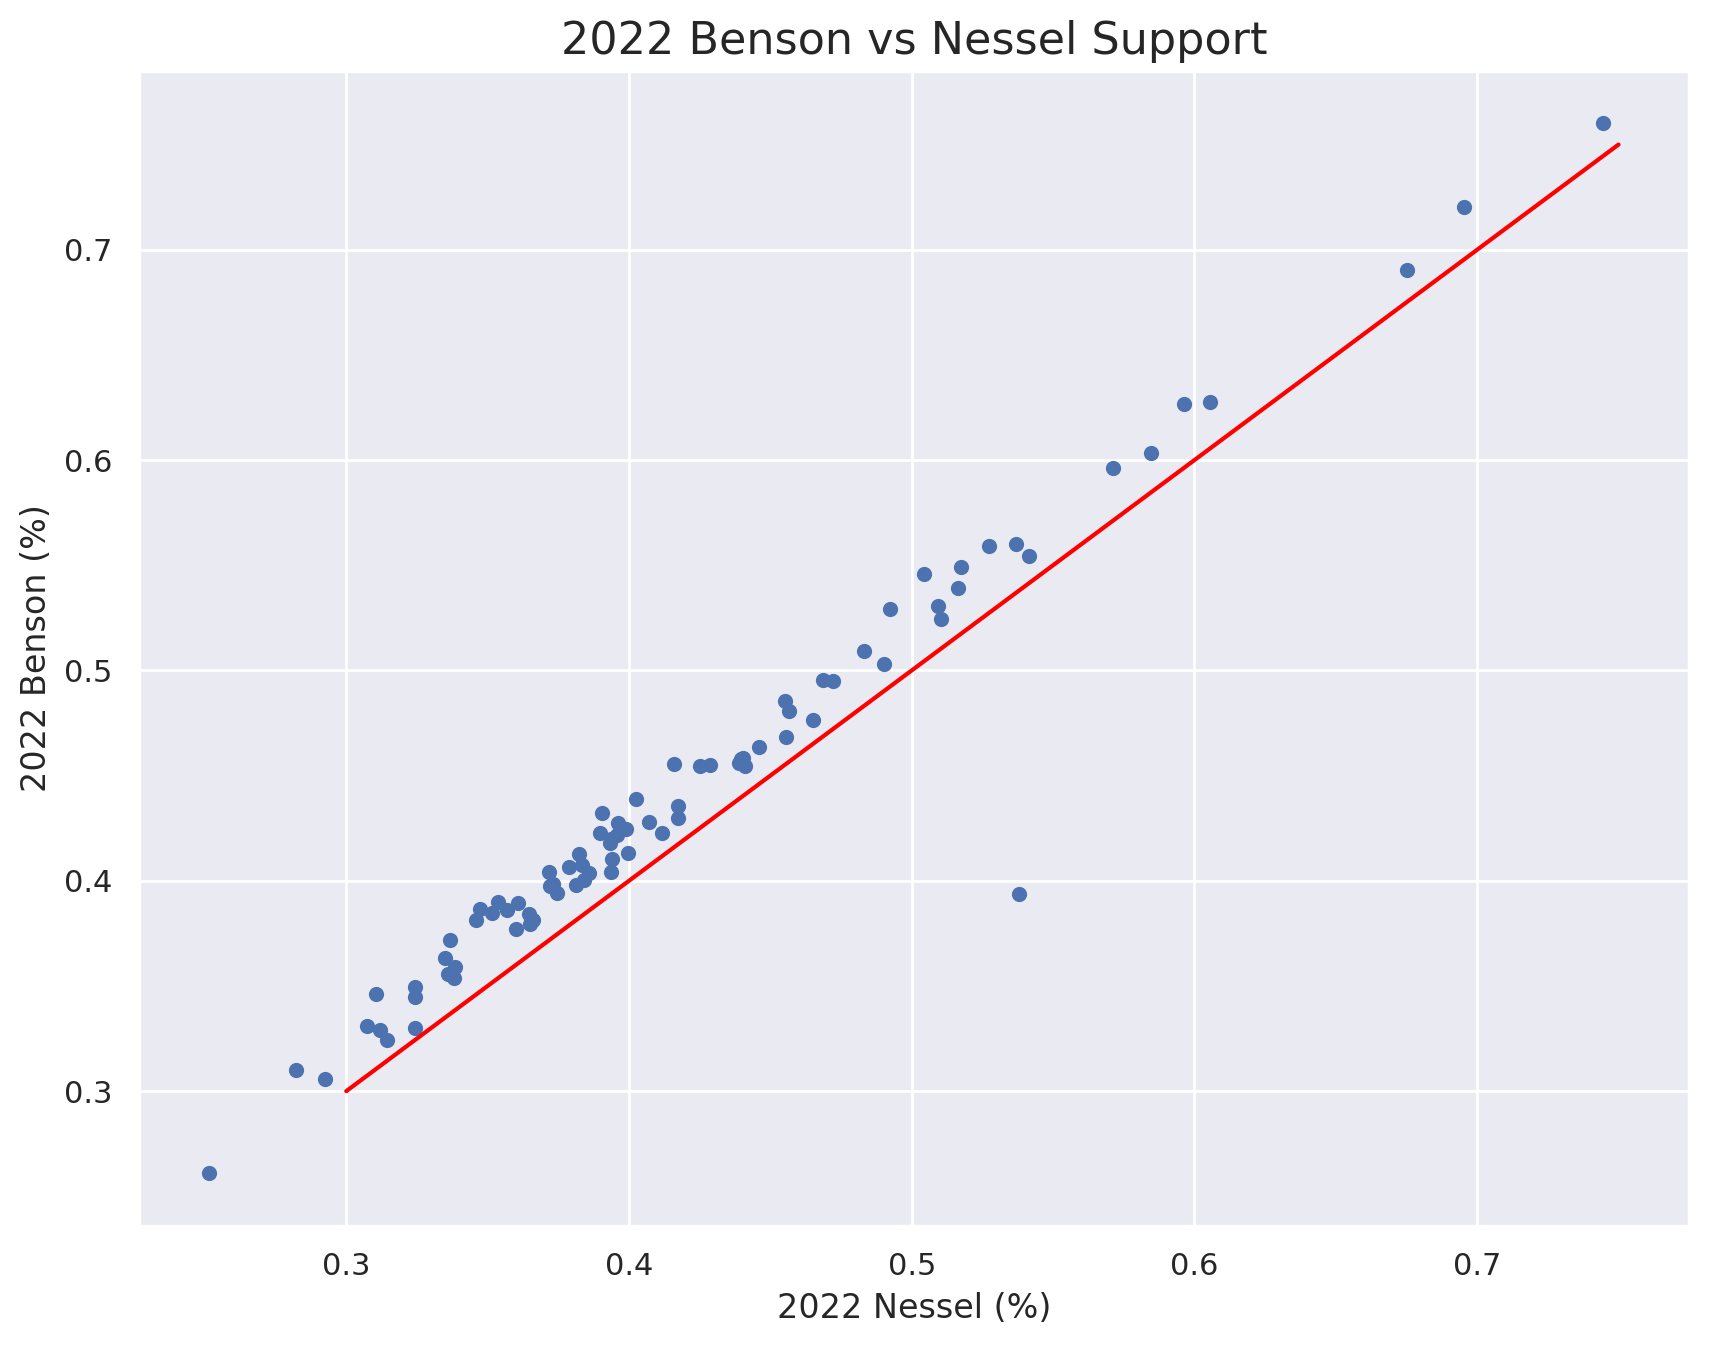

In [47]:
df.plot(x="ag_22_pct_nessel", y="sos_22_pct_benson", kind="scatter")
plt.plot([0.3, 0.75], [0.3, 0.75], color="red")
plt.title("2022 Benson vs Nessel Support")
plt.ylabel("2022 Benson (%)")
plt.xlabel("2022 Nessel (%)")

Text(0.5, 0, '2022 Prop 2 Support (%)')

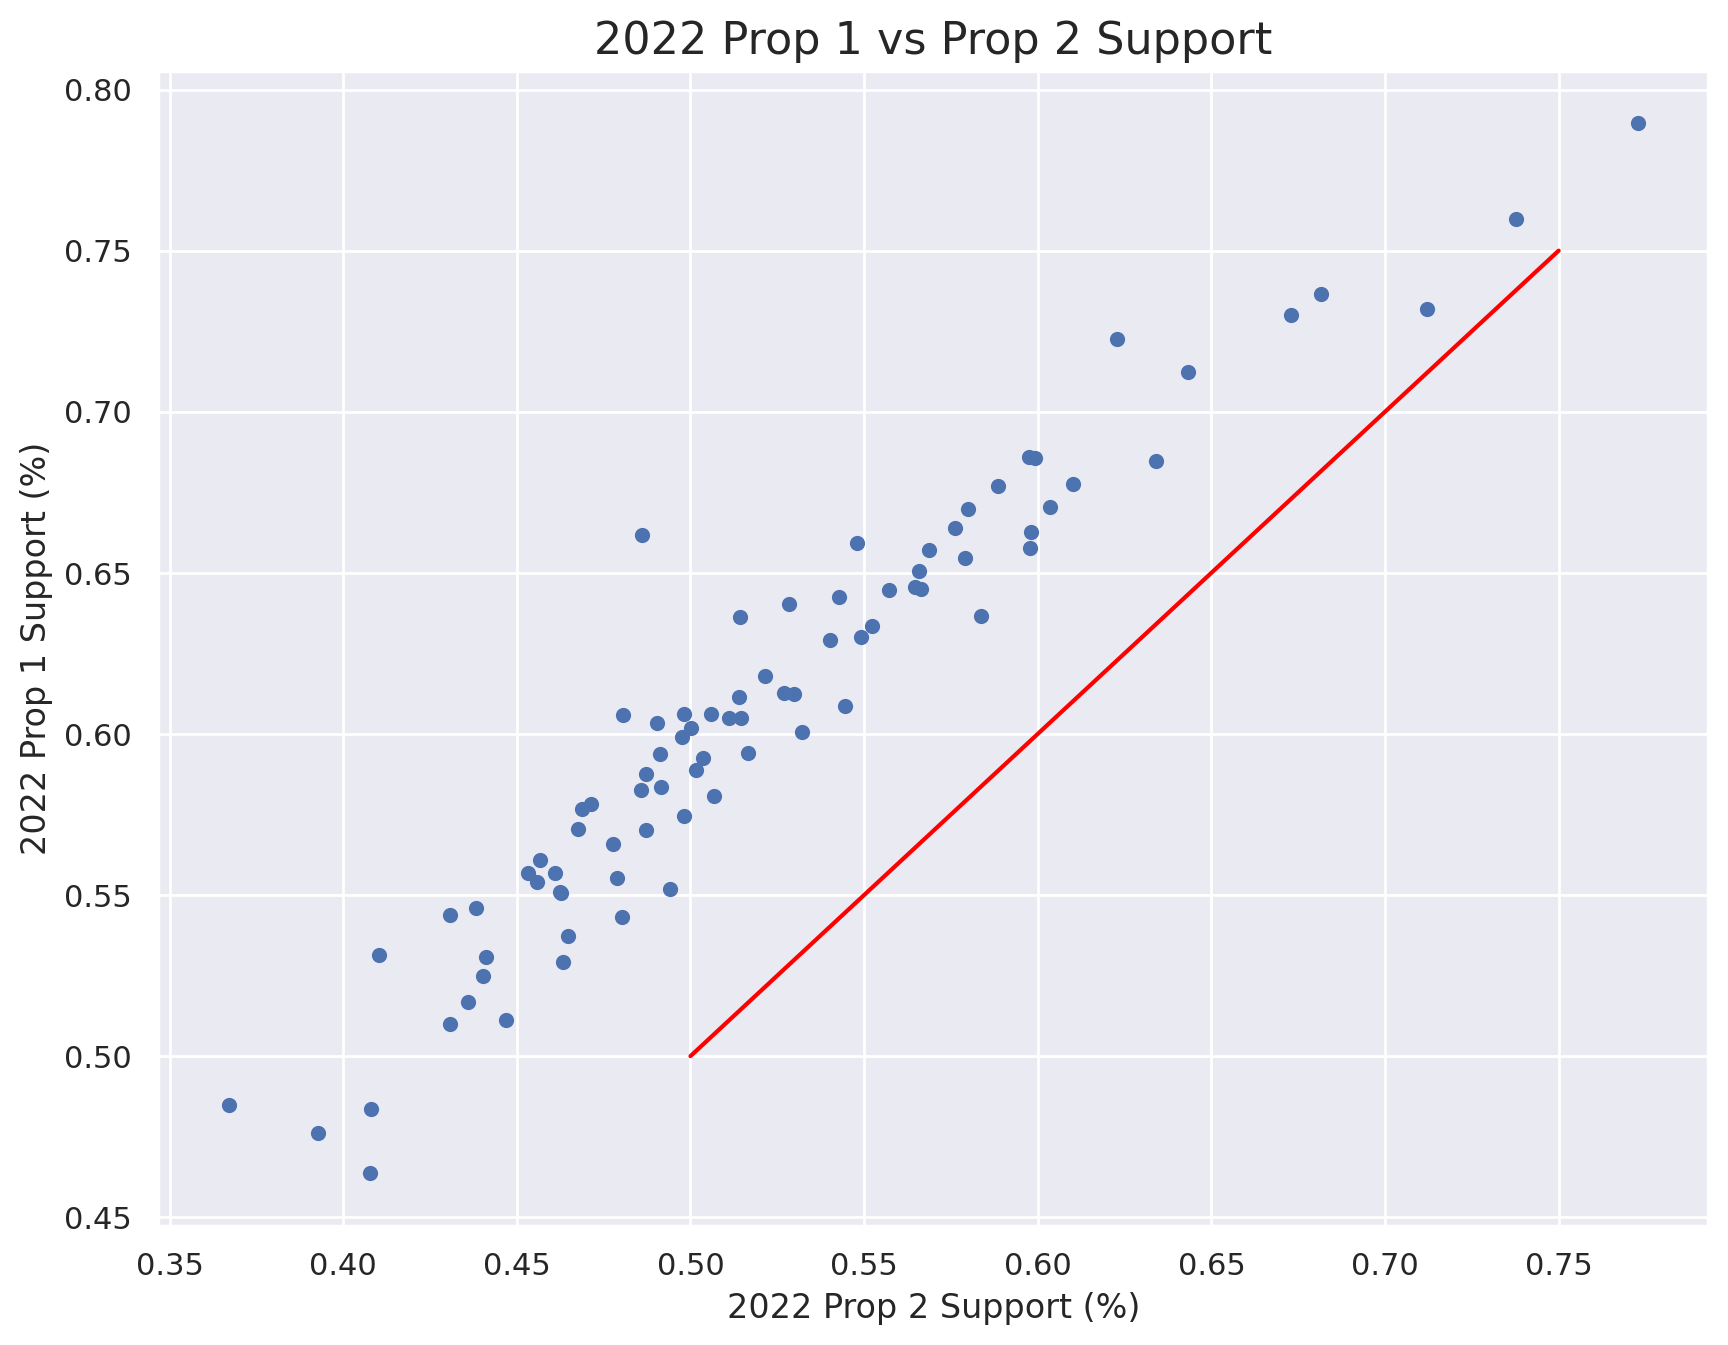

In [48]:
df.plot(x="prop2_22_yes_pct", y="prop1_22_yes_pct", kind="scatter")
plt.plot([0.5, 0.75], [0.5, 0.75], color="red")
plt.title("2022 Prop 1 vs Prop 2 Support")
plt.ylabel("2022 Prop 1 Support (%)")
plt.xlabel("2022 Prop 2 Support (%)")

Text(0.5, 0, '2022 Prop 3 Support (%)')

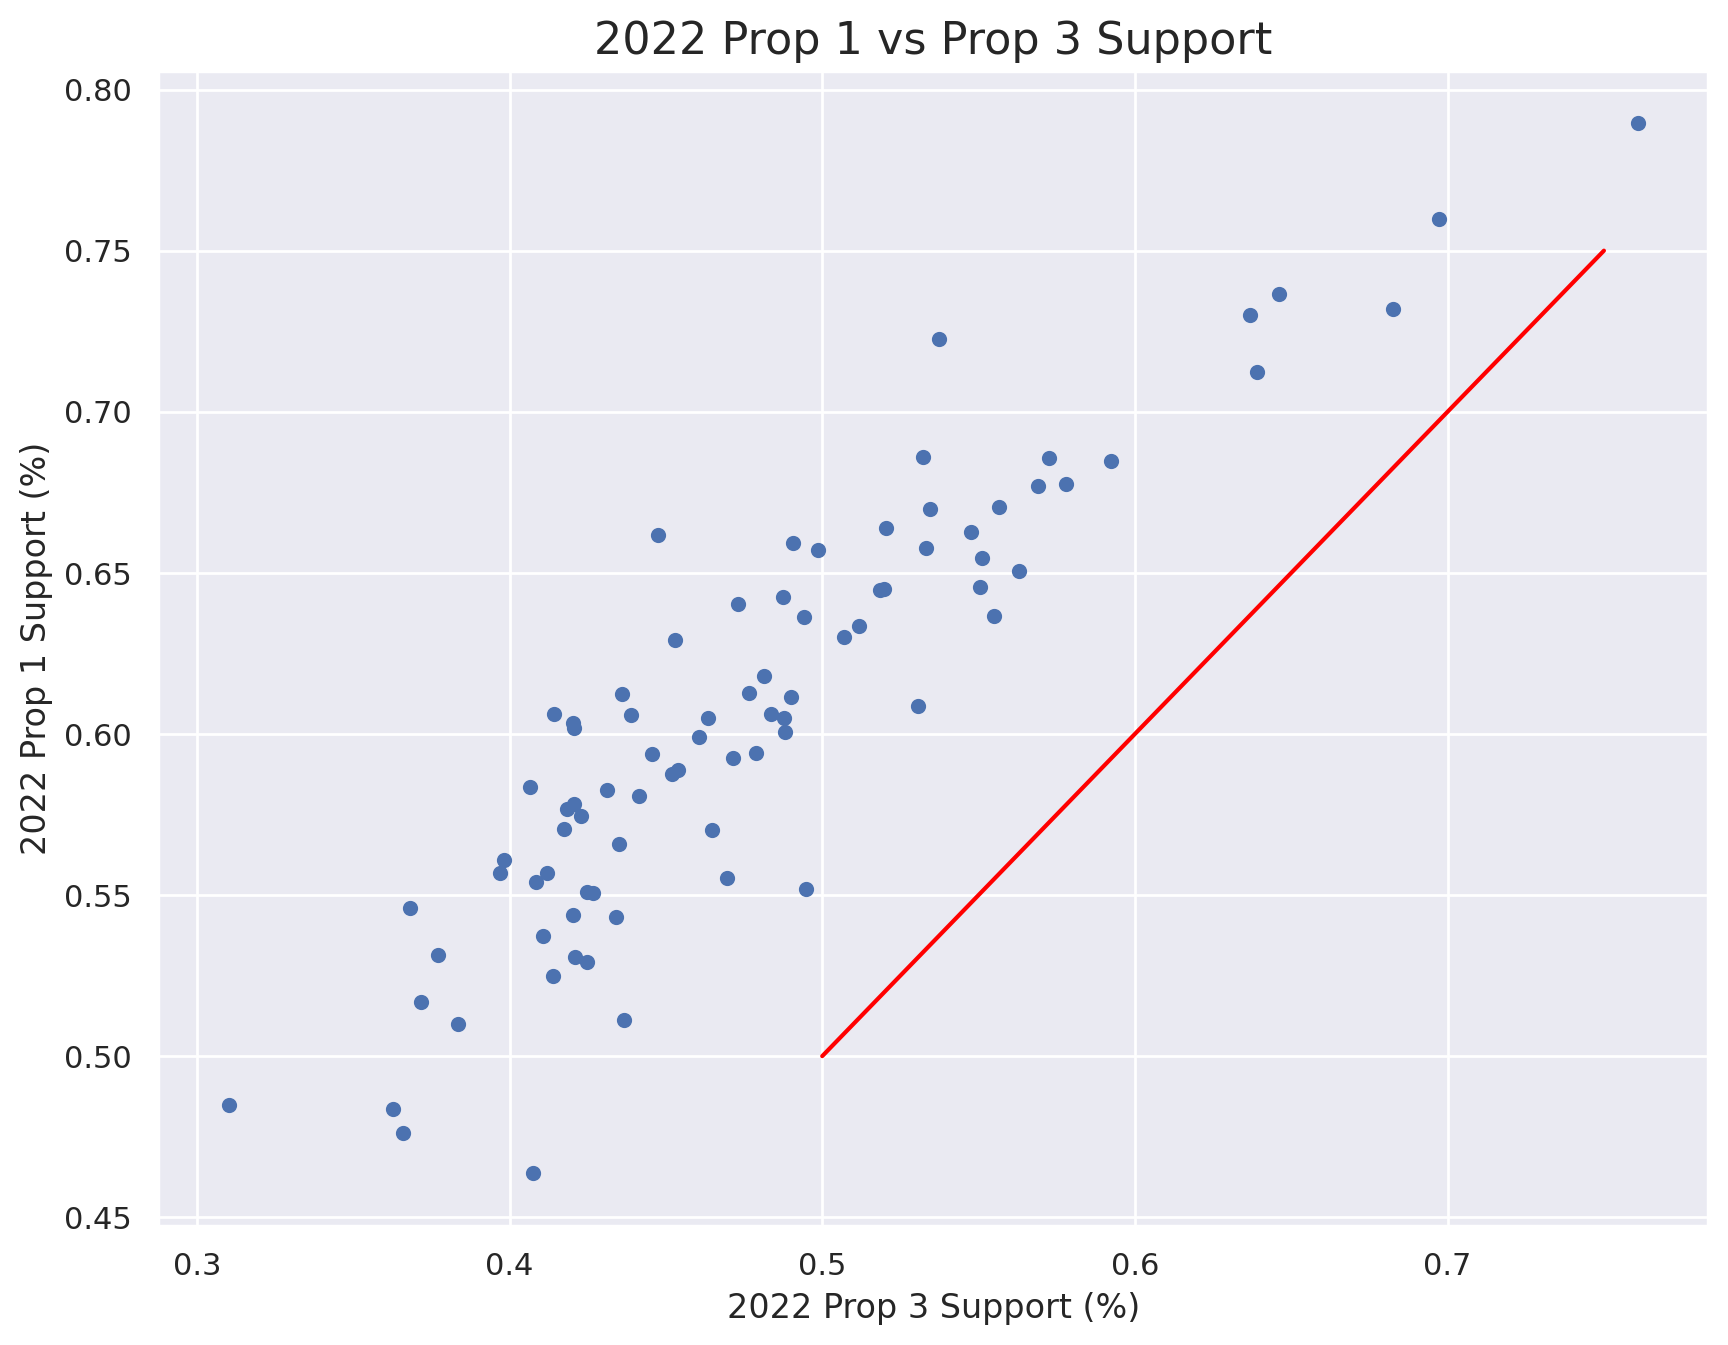

In [49]:
df.plot(x="prop3_22_yes_pct", y="prop1_22_yes_pct", kind="scatter")
plt.plot([0.5, 0.75], [0.5, 0.75], color="red")
plt.title("2022 Prop 1 vs Prop 3 Support")
plt.ylabel("2022 Prop 1 Support (%)")
plt.xlabel("2022 Prop 3 Support (%)")

In [50]:
df[df["prop3_22_yes_pct"]>0.7][["county", "prop1_22_yes_pct", "prop3_22_yes_pct", "gov_22_pct_whitmer"]]

,county,prop1_22_yes_pct,prop3_22_yes_pct,gov_22_pct_whitmer
4,Washtenaw,0.789621,0.76087,0.751483


Text(0.5, 0, '2022 Prop 3 Support (%)')

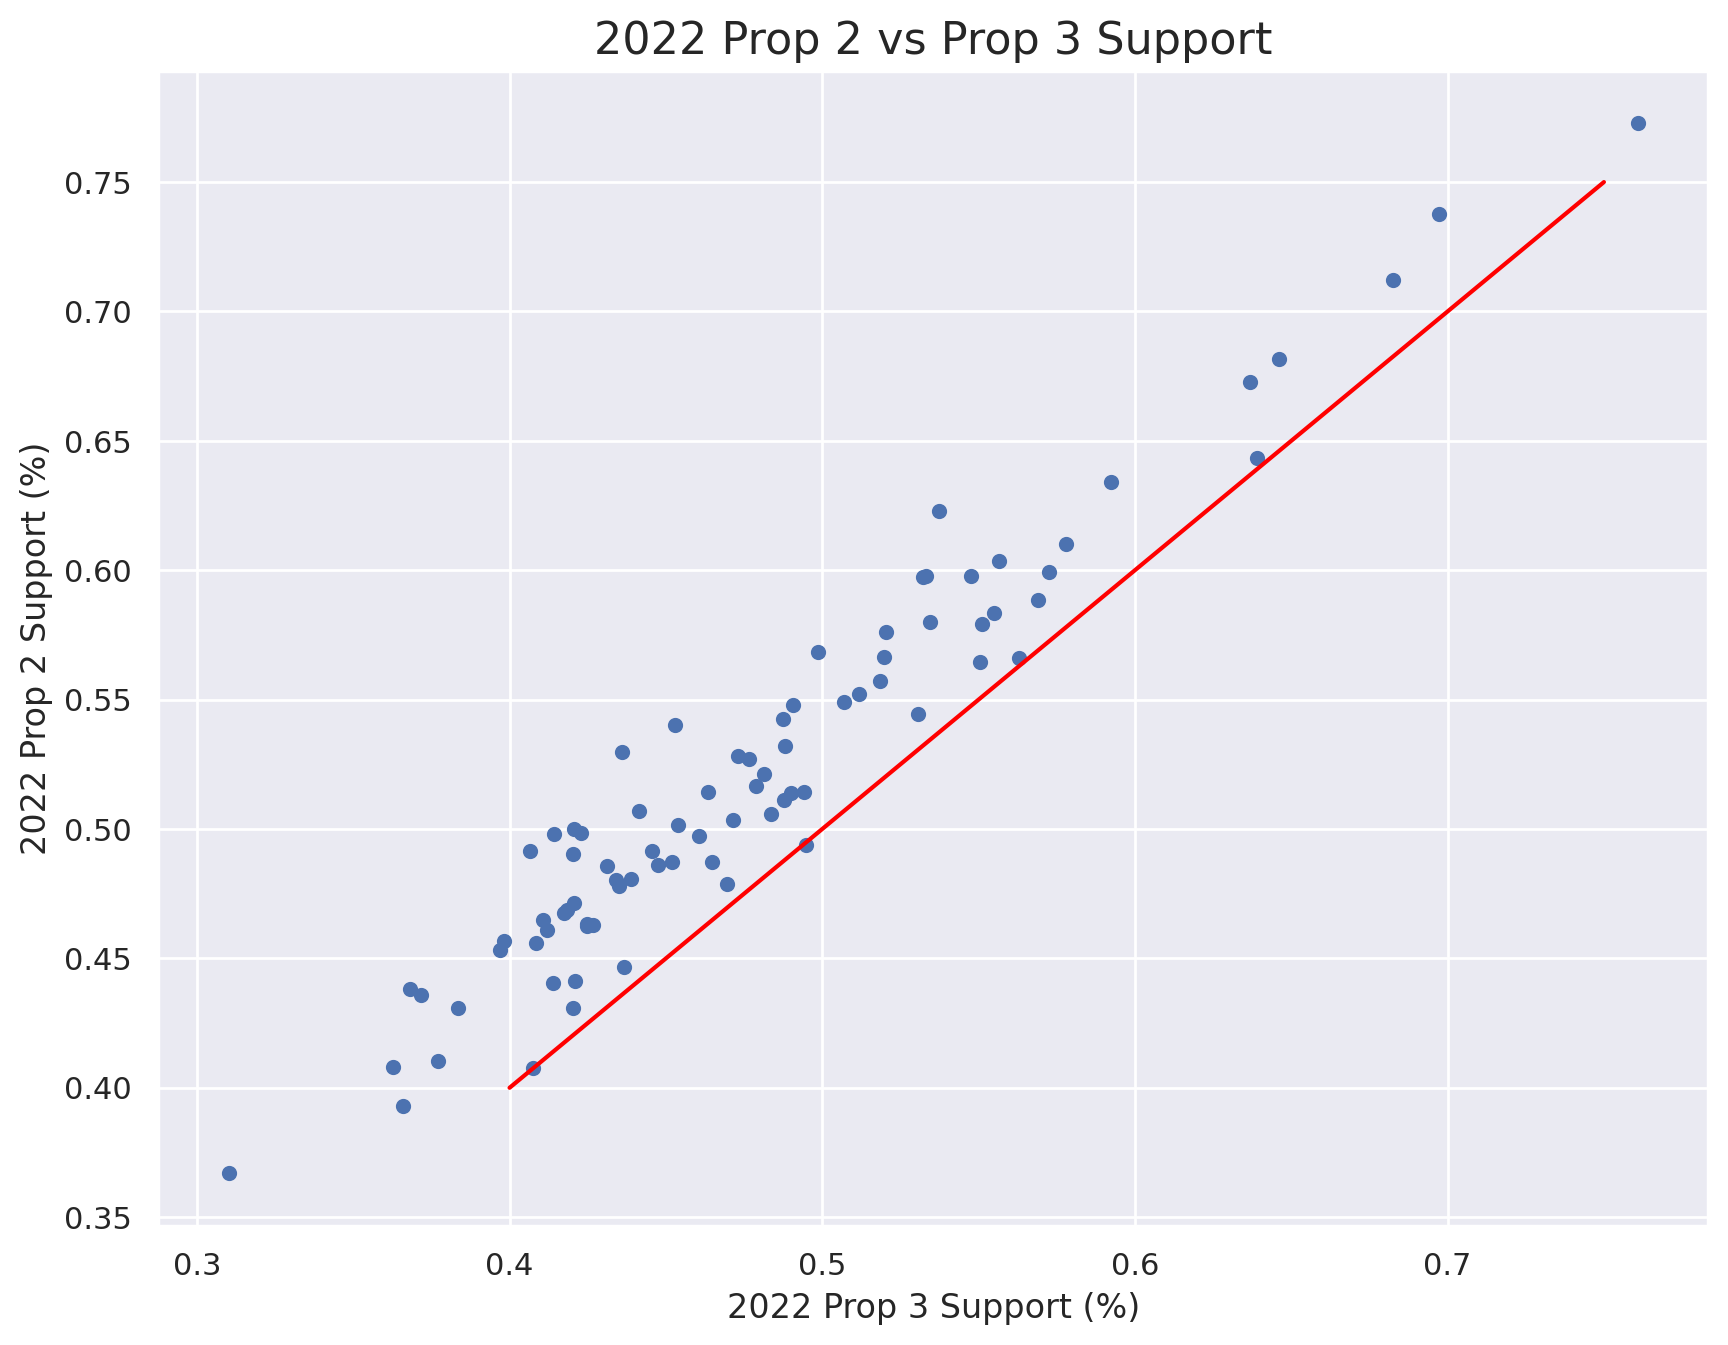

In [51]:
df.plot(x="prop3_22_yes_pct", y="prop2_22_yes_pct", kind="scatter")
plt.plot([0.4, 0.75], [0.4, 0.75], color="red")
plt.title("2022 Prop 2 vs Prop 3 Support")
plt.ylabel("2022 Prop 2 Support (%)")
plt.xlabel("2022 Prop 3 Support (%)")

Governors Race vs 

Text(0.5, 1.0, 'Proposition vs Whitmer support')

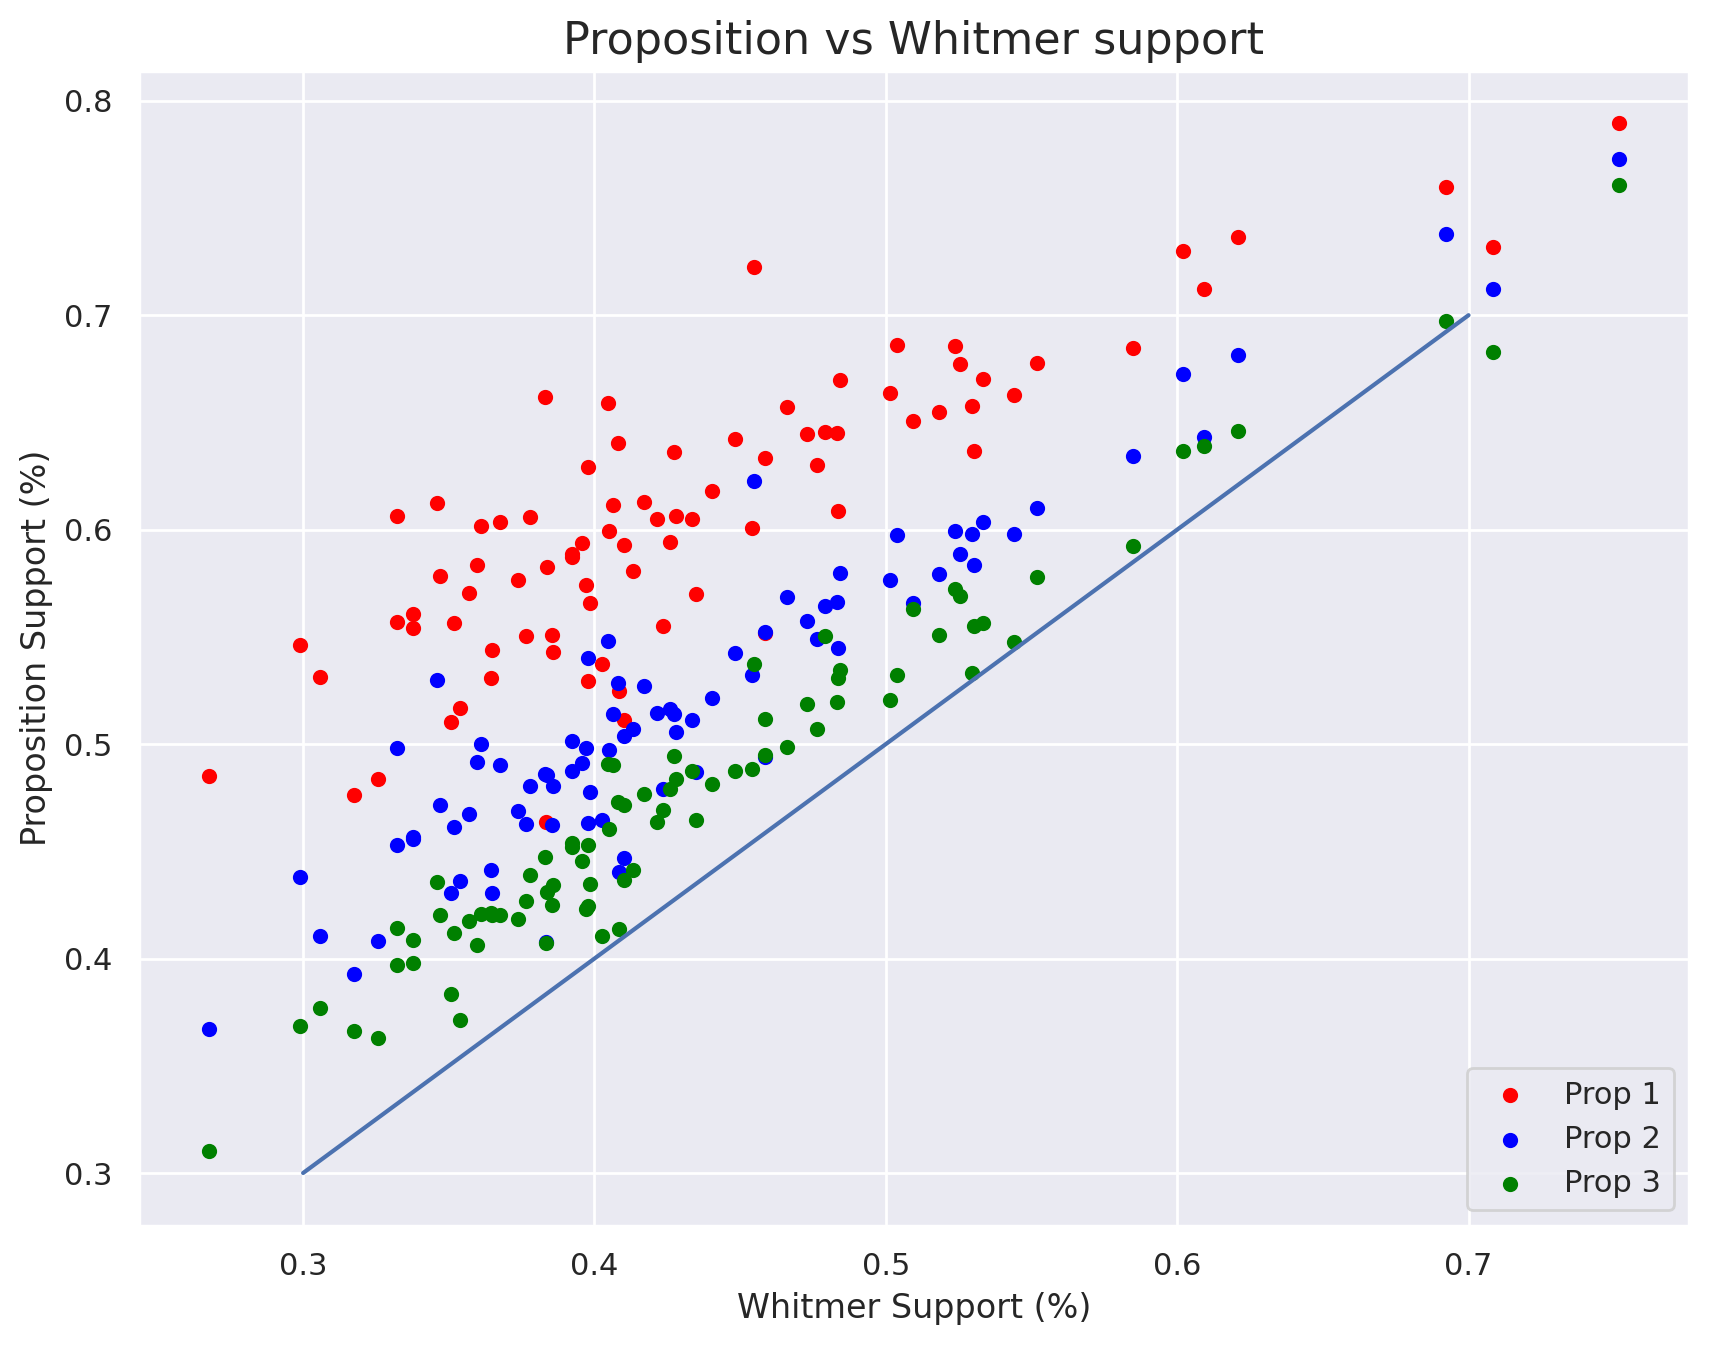

In [53]:
ax = df.plot(x="gov_22_pct_whitmer", y="prop1_22_yes_pct", kind="scatter", color="red")
df.plot(x="gov_22_pct_whitmer", y="prop2_22_yes_pct", kind="scatter", color='blue', ax=ax)    
df.plot(x="gov_22_pct_whitmer", y="prop3_22_yes_pct", kind="scatter", color='green', ax=ax) 
ax.plot([0.3, 0.7], [0.3, 0.7])

plt.legend(["Prop 1", "Prop 2", "Prop 3"], loc="lower right")
plt.ylabel("Proposition Support (%)")
plt.xlabel("Whitmer Support (%)")
plt.title("Proposition vs Whitmer support")

In [54]:
l = df["gov_22_pct_whitmer"]>0.55
l2 = df["prop2_22_yes_pct"]<0.55
df2 = df[l & l2]

In [55]:
df2[["county", "gov_22_pct_whitmer", "prop1_22_yes_pct", "prop2_22_yes_pct", "prop3_22_yes_pct"]]

,county,gov_22_pct_whitmer,prop1_22_yes_pct,prop2_22_yes_pct,prop3_22_yes_pct


Text(0.5, 1.0, 'Candidate vs Prop 3 Support')

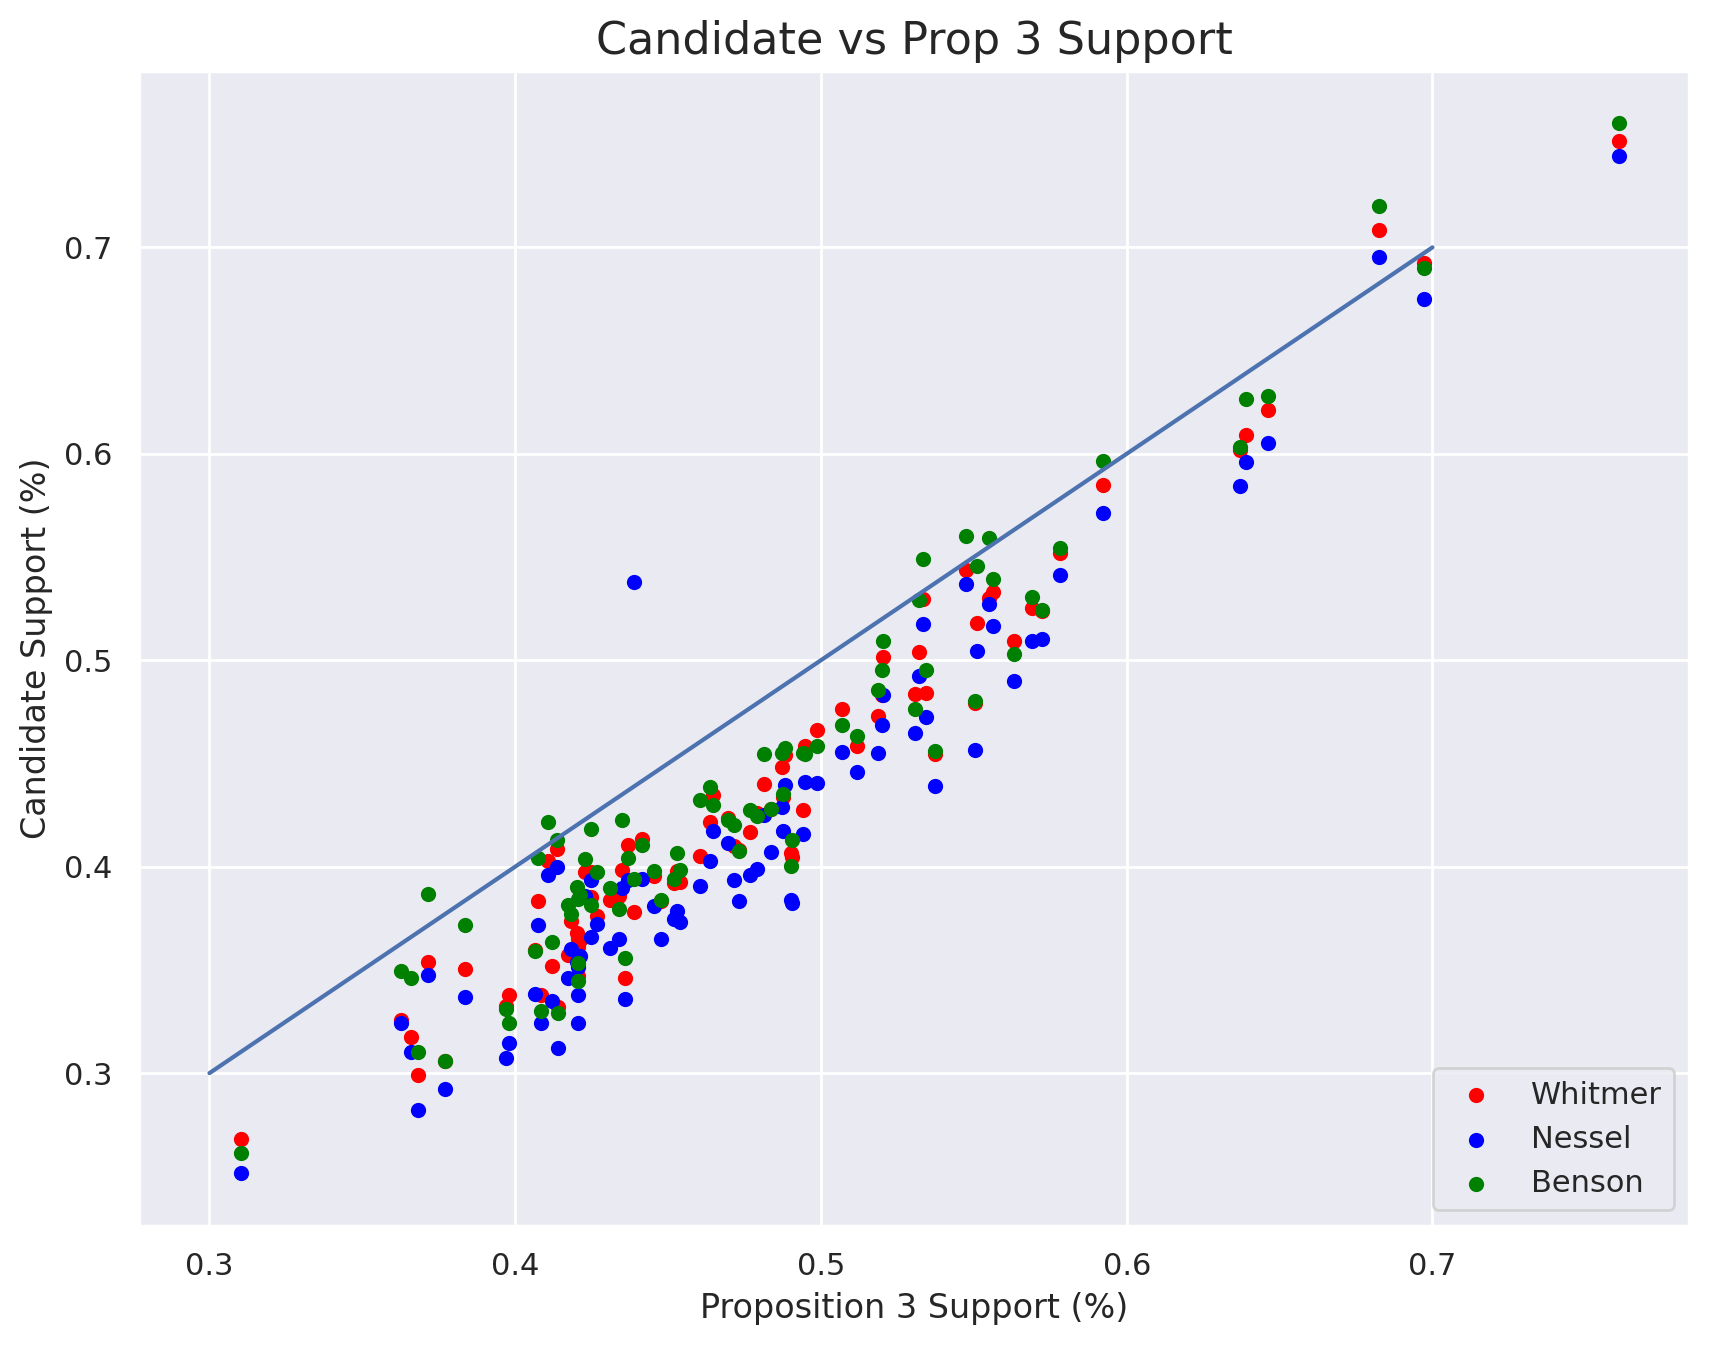

In [56]:
ax = df.plot(x="prop3_22_yes_pct", y="gov_22_pct_whitmer", kind="scatter", color="red")
df.plot(x="prop3_22_yes_pct", y="ag_22_pct_nessel", kind="scatter", color='blue', ax=ax)    
df.plot(x="prop3_22_yes_pct", y="sos_22_pct_benson", kind="scatter", color='green', ax=ax) 
ax.plot([0.3, 0.7], [0.3, 0.7])
plt.legend(["Whitmer", "Nessel", "Benson"], loc="lower right")
plt.xlabel("Proposition 3 Support (%)")
plt.ylabel("Candidate Support (%)")
plt.title("Candidate vs Prop 3 Support")

In [57]:
l = df["prop3_22_yes_pct"]<0.5
l2 = df["ag_22_pct_nessel"]>0.5
cols = ["county", "prop3_22_yes_pct"]
df[l & l2]

,county,gov_22_total,gov_22_whitmer,gov_22_pct_whitmer,gov_22_dixon,gov_22_pct_dixon,gov_22_buzuma,gov_22_pct_buzuma,gov_22_brandenburg,gov_22_pct_brandenburg,...,prop2_22_total,prop2_22_yes,prop2_22_yes_pct,prop2_22_no,prop2_22_no_pct,prop3_22_total,prop3_22_yes,prop3_22_yes_pct,prop3_22_no,prop3_22_no_pct
68,Arenac,7170,2709,0.377824,4314,0.601674,52,0.007252,58,0.008089,...,6904,3318,0.480591,3586,0.519409,7049,3094,0.438928,3955,0.561072


In [60]:
df.plot(
    kind='scatter',
    x='prop3_22_yes_pct', 
    y=['gov_22_pct_whitmer', 'ag_22_pct_nessel', 'sos_22_pct_benson'], 
    backend='plotly'
)
